#Exercise




Predict bike rental count (daily) based on the environmental & seasonal settings.This dataset contains the daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. 




Conduct the DNN analysis and improve the performance of the model using different archictecture. 




Columns Details:

1. Instant - Record Index

2. dteday - Date (Format: YYYY-MM-DD)

3. season - Season (1:   springer, 2: summer, 3: fall, 4: winter)

4. yr - Year (0: 2011,   1:2012)

5. mnth - Month (1 to 12)

6. holiday - Weather day is holiday or not

7. weekday - Day of the week

8. workingday - Working Day: If day is neither weekend nor holiday is 1, otherwise is 0

9. weathersit - Weather Situation (1: Clear/Few clouds; 2: Mist/Cloudy; 3: Light Snow/Light Rain; 4: Heavy Rain/Ice Pallets/Thunderstorm/Snow)

10. temp - Normalized temperature in Celsius. 

11. atemp - Normalized feeling temperature in Celsius. 

12. hum - Normalized humidity. 

13. windspeed - Normalized wind speed. 

14. casual - Count of casual users

15. registered - Count of registered users

16. cnt - Count of total rental bikes including both casual and registered

In [ ]:
# Mounting our drive to Google Colab
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd

In [ ]:
# Importing the dataset
path = '/drive/MyDrive/Colab Notebooks/11042023 Exercise/bike.csv'
df = pd.read_csv(path)

Data preprocessing

In [ ]:
# Exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df.shape

(731, 16)

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# checking for missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
# To split data into X and Y

# Y for target response variable
Y = df['cnt']

# X for feature variable but drop record index and date
X = df.drop(['cnt','instant','dteday'], axis =1)

In [ ]:
# Splitting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (584, 13)
y_train shape (584,)
X_test shape (147, 13)
y_test shape (147,)


In [ ]:
# Normalization/ standardization 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Building initial model

In [ ]:
# keras imports for the dataset and building our neural network

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import initializers
from keras import regularizers
from keras.callbacks import EarlyStopping

In [ ]:
# building a linear stack of layers with the sequential model

L1 = 100
L2 = 100
L3 = 100

model = Sequential()
model.add(Dense(L1, input_dim = 13, activation = 'relu'))
model.add(Dense(L2, activation = 'relu'))
model.add(Dense(L3, activation = 'relu'))

# output layer 
model.add(Dense(10, activation = 'linear'))

In [ ]:
# compiling the sequential model
model.compile(loss='mse',
              metrics=['mae'], optimizer='adam')

In [ ]:
# training the model for 10 epoch
history = model.fit(X_train,y_train, epochs=10,
                    batch_size=100, validation_data=(X_test, y_test))

Epoch 1/10
6/6 [==============================] - 3s 56ms/step - loss: 23826556.0000 - mae: 4495.1514 - val_loss: 24864774.0000 - val_mae: 4539.9468
Epoch 2/10
6/6 [==============================] - 0s 9ms/step - loss: 23822798.0000 - mae: 4494.6953 - val_loss: 24859746.0000 - val_mae: 4539.3384
Epoch 3/10
6/6 [==============================] - 0s 12ms/step - loss: 23816580.0000 - mae: 4493.9614 - val_loss: 24850658.0000 - val_mae: 4538.2656
Epoch 4/10
6/6 [==============================] - 0s 13ms/step - loss: 23805118.0000 - mae: 4492.6353 - val_loss: 24833982.0000 - val_mae: 4536.3374
Epoch 5/10
6/6 [==============================] - 0s 14ms/step - loss: 23784404.0000 - mae: 4490.2935 - val_loss: 24804136.0000 - val_mae: 4532.9556
Epoch 6/10
6/6 [==============================] - 0s 13ms/step - loss: 23747962.0000 - mae: 4486.2461 - val_loss: 24752410.0000 - val_mae: 4527.1992
Epoch 7/10
6/6 [==============================] - 0s 10ms/step - loss: 23686058.0000 - mae: 4479.4185 - val

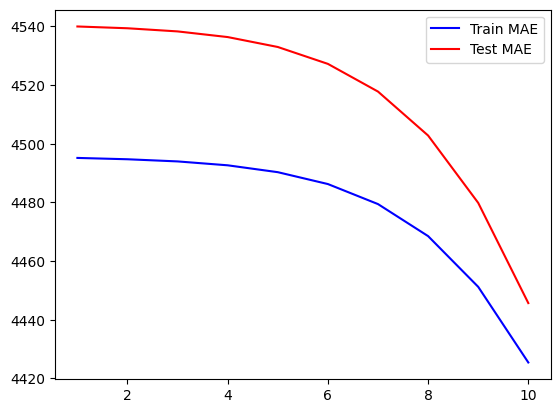

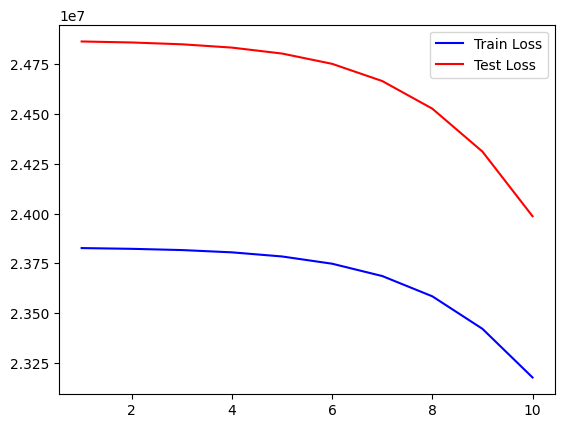

In [ ]:
# visualization

import matplotlib.pyplot as plt

mae2 =history.history['mae']
val_mae = history.history['val_mae']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(mae2)+1)


plt.plot(epochs, mae2,'b',label='Train MAE')
plt.plot(epochs, val_mae,'r',label='Test MAE')
plt.legend()
plt.figure()


plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

Model with initializer and regularizer

Epoch 1/50
6/6 [==============================] - 2s 69ms/step - loss: 23827932.0000 - mae: 4495.3262 - val_loss: 24862126.0000 - val_mae: 4539.7153
Epoch 2/50
6/6 [==============================] - 0s 20ms/step - loss: 23817252.0000 - mae: 4494.1650 - val_loss: 24848896.0000 - val_mae: 4538.2397
Epoch 3/50
6/6 [==============================] - 0s 23ms/step - loss: 23801584.0000 - mae: 4492.4355 - val_loss: 24827628.0000 - val_mae: 4535.8604
Epoch 4/50
6/6 [==============================] - 0s 23ms/step - loss: 23775676.0000 - mae: 4489.5786 - val_loss: 24791646.0000 - val_mae: 4531.8589
Epoch 5/50
6/6 [==============================] - 0s 28ms/step - loss: 23732310.0000 - mae: 4484.8428 - val_loss: 24731436.0000 - val_mae: 4525.1792
Epoch 6/50
6/6 [==============================] - 0s 35ms/step - loss: 23661066.0000 - mae: 4477.0122 - val_loss: 24633270.0000 - val_mae: 4514.3149
Epoch 7/50
6/6 [==============================] - 0s 23ms/step - loss: 23544868.0000 - mae: 4464.3608 - va

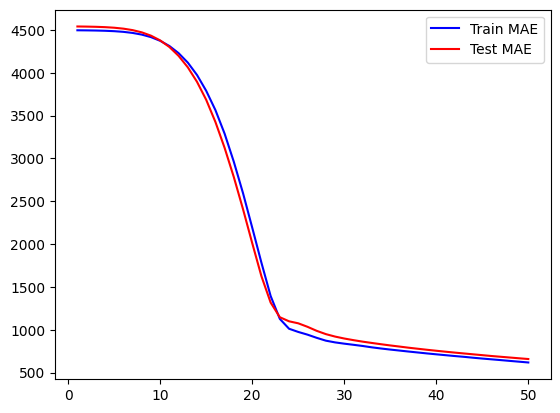

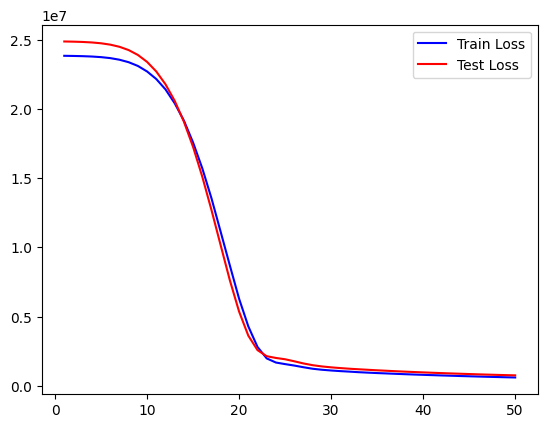

In [ ]:
L1 = 100
L2 = 100
L3 = 100

model = Sequential()
model.add(Dense(L1, input_dim = 13, activation = 'relu', kernel_initializer='he_normal',
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(L2, activation = 'relu'))
model.add(Dense(L3, activation = 'relu'))

model.add(Dense(10, activation = 'linear'))

model.compile(loss='mse',
              metrics=['mae'], optimizer='adam')

history = model.fit(X_train,y_train, epochs=50,
                    batch_size=100, validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

mae2 =history.history['mae']
val_mae = history.history['val_mae']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(mae2)+1)


plt.plot(epochs, mae2,'b',label='Train MAE')
plt.plot(epochs, val_mae,'r',label='Test MAE')
plt.legend()
plt.figure()


plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

Model with dropout, initializer and regularizer

Epoch 1/50
6/6 [==============================] - 1s 43ms/step - loss: 23825272.0000 - mae: 4495.0273 - val_loss: 24860852.0000 - val_mae: 4539.4956
Epoch 2/50
6/6 [==============================] - 0s 13ms/step - loss: 23816604.0000 - mae: 4493.9668 - val_loss: 24849690.0000 - val_mae: 4538.1333
Epoch 3/50
6/6 [==============================] - 0s 10ms/step - loss: 23802900.0000 - mae: 4492.3296 - val_loss: 24830148.0000 - val_mae: 4535.7988
Epoch 4/50
6/6 [==============================] - 0s 13ms/step - loss: 23778260.0000 - mae: 4489.3887 - val_loss: 24795074.0000 - val_mae: 4531.6348
Epoch 5/50
6/6 [==============================] - 0s 10ms/step - loss: 23734688.0000 - mae: 4484.2070 - val_loss: 24733364.0000 - val_mae: 4524.3384
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 23659142.0000 - mae: 4475.3364 - val_loss: 24629112.0000 - val_mae: 4512.0845
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 23533974.0000 - mae: 4460.7622 - va

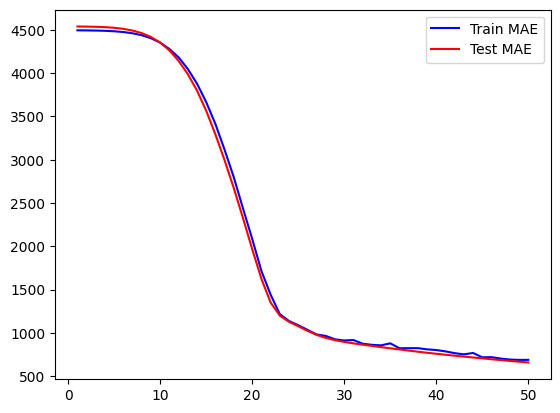

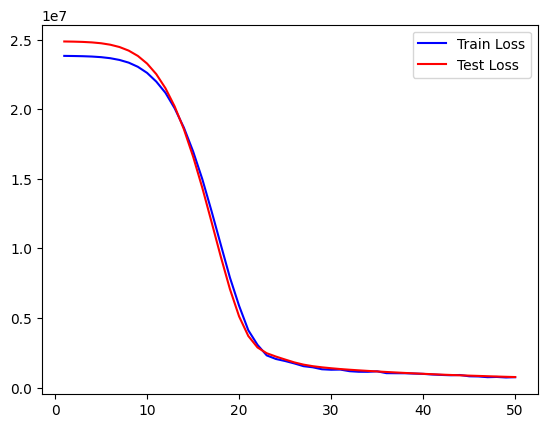

In [ ]:
L1 = 100
L2 = 100
L3 = 100

model = Sequential()
model.add(Dense(L1, input_dim = 13, activation = 'relu', kernel_initializer='he_normal',
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(L2, activation = 'relu'))
model.add(Dense(L3, activation = 'relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(10, activation = 'linear'))

model.compile(loss='mse',
              metrics=['mae'], optimizer='adam')

history = model.fit(X_train,y_train, epochs=50,
                    batch_size=100, validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

mae2 =history.history['mae']
val_mae = history.history['val_mae']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(mae2)+1)


plt.plot(epochs, mae2,'b',label='Train MAE')
plt.plot(epochs, val_mae,'r',label='Test MAE')
plt.legend()
plt.figure()


plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

Model with early stopping, dropout, initialiser and regulariser

Epoch 1/30
6/6 [==============================] - 1s 45ms/step - loss: 23825020.0000 - mae: 4495.0132 - val_loss: 24860824.0000 - val_mae: 4539.5610
Epoch 2/30
6/6 [==============================] - 0s 14ms/step - loss: 23816972.0000 - mae: 4494.1182 - val_loss: 24850368.0000 - val_mae: 4538.4014
Epoch 3/30
6/6 [==============================] - 0s 14ms/step - loss: 23803956.0000 - mae: 4492.6821 - val_loss: 24831492.0000 - val_mae: 4536.3247
Epoch 4/30
6/6 [==============================] - 0s 11ms/step - loss: 23780258.0000 - mae: 4490.0479 - val_loss: 24795686.0000 - val_mae: 4532.4155
Epoch 5/30
6/6 [==============================] - 0s 14ms/step - loss: 23735518.0000 - mae: 4485.1802 - val_loss: 24730196.0000 - val_mae: 4525.2910
Epoch 6/30
6/6 [==============================] - 0s 14ms/step - loss: 23656358.0000 - mae: 4476.5337 - val_loss: 24617192.0000 - val_mae: 4513.0171
Epoch 7/30
6/6 [==============================] - 0s 12ms/step - loss: 23522374.0000 - mae: 4462.0918 - va

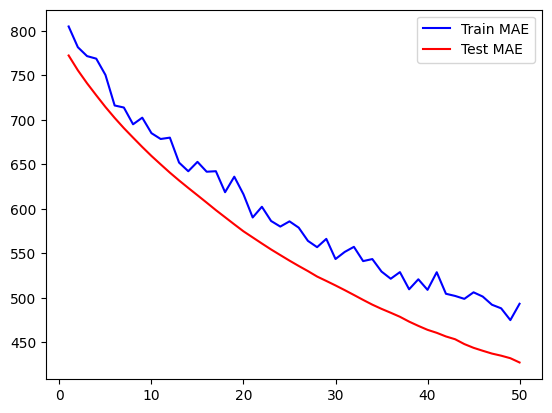

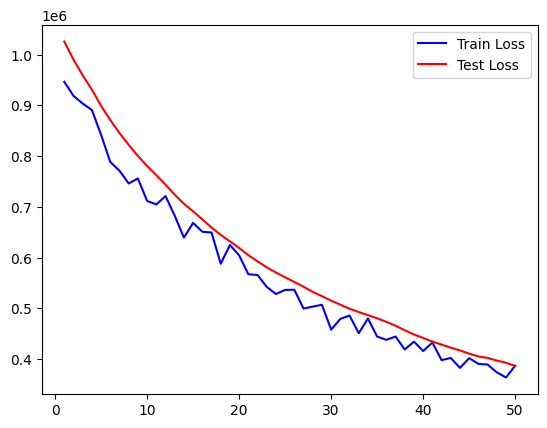

In [ ]:
L1 = 100
L2 = 100
L3 = 100

model = Sequential()
model.add(Dense(L1, input_dim = 13, activation = 'relu', kernel_initializer='he_normal',
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(L2, activation = 'relu'))
model.add(Dense(L3, activation = 'relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(10, activation = 'linear'))

model.compile(loss='mse',
              metrics=['mae'], optimizer='adam')

early_stopping_monitor = EarlyStopping(patience = 6)
history = model.fit(X_train, y_train, epochs = 30,
                    batch_size = 100, validation_data = (X_test, y_test),
                    callbacks = [early_stopping_monitor])

history = model.fit(X_train,y_train, epochs=50,
                    batch_size=100, validation_data=(X_test, y_test))

mae2 =history.history['mae']
val_mae = history.history['val_mae']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(mae2)+1)


plt.plot(epochs, mae2,'b',label='Train MAE')
plt.plot(epochs, val_mae,'r',label='Test MAE')
plt.legend()
plt.figure()


plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

Grid Search hyperparameters

In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# need to have sklearn model selection to import grid search cross validation
from sklearn.model_selection import GridSearchCV

# also require scikeras.wrappers to import from Keras classifier
from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasRegressor 

In [ ]:
def create_model():
  # create model
  # model building, architecture used earlier
  model1 = Sequential()
  model1.add(Dense(100, input_dim = 13, activation='relu'))
  model1.add(Dense(100, activation = 'relu'))
  model1.add(Dense(100, activation = 'relu'))
  model1.add(Dense(1, activation = 'linear'))

  #compile model
  model1.compile(loss='mse',
                 optimizer='adam', metrics=['mae'])
  return model1

Tuning batch size and epoch

In [ ]:
# create model
model1 = KerasRegressor(model = create_model, loss ='mse',
                         verbose = 0) 

# define the grid search parameters
batch_size = [50, 100] 
epochs = [10, 25, 50] 

# calling batch size and epoch (based on iteration here) based on dictionary
param_grid = dict(batch_size=batch_size,
                  epochs=epochs)

grid = GridSearchCV(estimator=model1, 
                    param_grid=param_grid,
                    n_jobs=-1, cv=3)

grid_result = grid.fit(X_train, y_train)

In [ ]:
#summarize result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.905471 using {'batch_size': 50, 'epochs': 50}
-4.370569 (0.239553) with: {'batch_size': 50, 'epochs': 10}
0.752204 (0.018538) with: {'batch_size': 50, 'epochs': 25}
0.905471 (0.009940) with: {'batch_size': 50, 'epochs': 50}
-5.517276 (0.378847) with: {'batch_size': 100, 'epochs': 10}
-2.864046 (0.126924) with: {'batch_size': 100, 'epochs': 25}
0.760713 (0.015933) with: {'batch_size': 100, 'epochs': 50}


Tuning optimizer

In [ ]:
model2 = KerasRegressor(model=create_model,
                         loss='mse',
                         epochs=50, batch_size=50, verbose=0)

# define the grid search parameters
# even though it is updated as adam earlier, it will still try one by one
optimizer = ['SGD', 'RMSProp', 'Adagrad', 'Adadelta',
             'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model2,
                    param_grid=param_grid,
                    n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_,
                             grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.912744 using {'optimizer': 'SGD'}
0.912744 (0.006781) with: {'optimizer': 'SGD'}
0.909845 (0.005503) with: {'optimizer': 'RMSProp'}
0.899229 (0.010779) with: {'optimizer': 'Adagrad'}
0.909138 (0.002426) with: {'optimizer': 'Adadelta'}
0.908637 (0.004406) with: {'optimizer': 'Adam'}
0.905105 (0.008313) with: {'optimizer': 'Adamax'}
0.901748 (0.008808) with: {'optimizer': 'Nadam'}


Tuning activation  function

In [ ]:
def create_model(activation='relu'):
  # create model
  model = Sequential()
  model.add(Dense(100, input_dim = 13, activation=activation)) # call from earlier defined activation
  model.add(Dense(100, activation=activation)) # dense to change number of neurons
  model.add(Dense(100, activation=activation))
  model.add(Dense(1, activation='linear'))

# Compile model
  model.compile(loss='mse', optimizer='SGD', metrics=['mae'])
  return model

In [ ]:
model3 = KerasRegressor(model=create_model, epochs=50, batch_size=50, verbose=0)
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(model__activation=activation)
grid =  GridSearchCV(estimator=model3, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [-1.00070470e-03 -1.31706990e+13  7.42609344e-01             nan
  5.72076645e-01 -8.48938231e-02 -2.39707521e-02             nan]
  warnings.warn(


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_,
                             grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.742609 using {'model__activation': 'softsign'}
-0.001001 (0.000723) with: {'model__activation': 'softmax'}
-13170699004265.671875 (18311474356129.687500) with: {'model__activation': 'softplus'}
0.742609 (0.047853) with: {'model__activation': 'softsign'}
nan (nan) with: {'model__activation': 'relu'}
0.572077 (0.062132) with: {'model__activation': 'tanh'}
-0.084894 (0.052671) with: {'model__activation': 'sigmoid'}
-0.023971 (0.003623) with: {'model__activation': 'hard_sigmoid'}
nan (nan) with: {'model__activation': 'linear'}


Final model

Epoch 1/50
12/12 [==============================] - 1s 20ms/step - loss: 21469450.0000 - mae: 4097.9341 - val_loss: 11803043.0000 - val_mae: 3094.6733
Epoch 2/50
12/12 [==============================] - 0s 7ms/step - loss: 8169090.5000 - mae: 2523.9402 - val_loss: 5733593.5000 - val_mae: 2106.7168
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 5185105.0000 - mae: 1977.5750 - val_loss: 4052617.2500 - val_mae: 1644.4307
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 4166646.7500 - mae: 1753.3770 - val_loss: 3324098.7500 - val_mae: 1545.2004
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 3098214.5000 - mae: 1482.3627 - val_loss: 2885353.0000 - val_mae: 1373.3206
Epoch 6/50
12/12 [==============================] - 0s 7ms/step - loss: 2513899.7500 - mae: 1309.8521 - val_loss: 2410554.2500 - val_mae: 1337.5183
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 1920819.2500 - mae: 1153.7410 - val_l

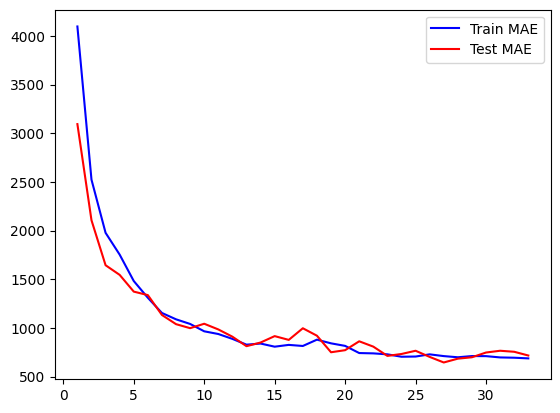

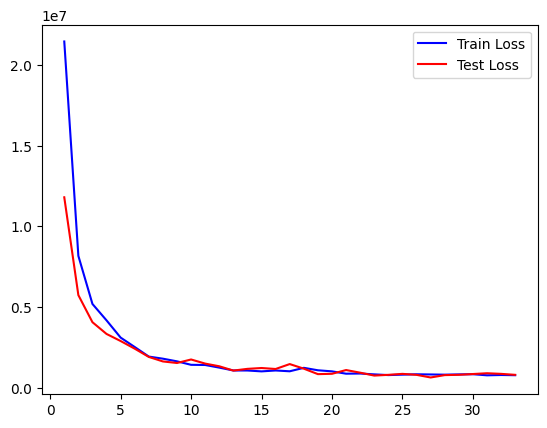

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim = 13, activation = 'softsign'))
model.add(Dense(100, activation = 'softsign'))
model.add(Dense(100, activation = 'softsign'))
model.add(Dense(1, activation = 'linear'))

model.compile(loss='mse',
              metrics=['mae'], optimizer='SGD')

early_stopping_monitor = EarlyStopping(patience = 6)
history = model.fit(X_train, y_train, epochs = 50,
                    batch_size = 50, validation_data = (X_test, y_test),
                    callbacks = [early_stopping_monitor])

mae2 =history.history['mae']
val_mae = history.history['val_mae']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(mae2)+1)


plt.plot(epochs, mae2,'b',label='Train MAE')
plt.plot(epochs, val_mae,'r',label='Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()